# LOGISTIC REGRESSION TRAINING
---

### The code blocks below until the next line is for training. 

In [1]:
# logistic_regression.ipynb

import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from PIL import Image
from joblib import dump

# data path
data_dir = "../../../archive/seg_train/seg_train/"  # update to add your relative path (our team members)

# Parameters
img_size = (150, 150)

# Load and preprocess images
def load_images(data_dir, img_size):
    X = []
    y = []
    class_names = os.listdir(data_dir)
    
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        
        for img_file in tqdm(os.listdir(class_path), desc=f"Loading {class_name}"):
            try:
                img_path = os.path.join(class_path, img_file)
                img = Image.open(img_path).convert('RGB').resize(img_size)
                img_array = np.array(img).flatten()
                img_array = img_array / 255.0

                X.append(img_array)
                y.append(class_name)
            except Exception as e:
                print(f"Error loading image {img_file}: {e}")
    
    return np.array(X), np.array(y)

X, y = load_images(data_dir, img_size)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train Logistic Regression
clf = LogisticRegression(solver='lbfgs', max_iter=3000)
clf.fit(X_train,y_train)

# Evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))




ModuleNotFoundError: No module named 'sklearn'

---
## THE CODE BELOW IS TO SAVE THE MODEL AND ITS WEIGTHS. PLEASE DO NOT CHANGE

In [4]:
## DO NOT CHANGE THIS PART OF CODE!!

## ----------------------------------------------------------------------
# this is for saving the model weights for testing
dump(clf, "intel_clf.joblib")
dump(le,  "intel_le.joblib")
## ----------------------------------------------------------------------

['intel_le.joblib']

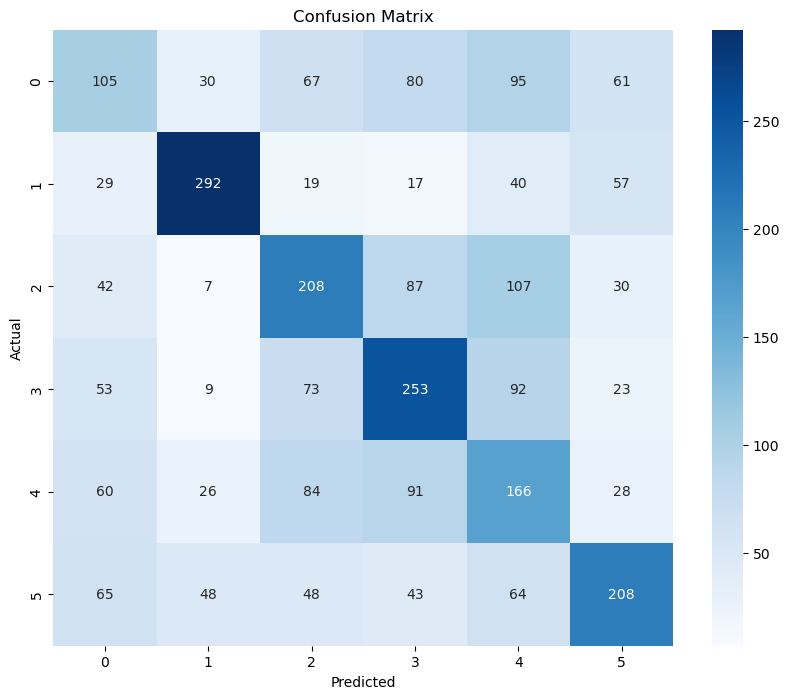

y_test shape: (2807,)
y_pred shape: (2807,)
Total samples in confusion matrix: 2807


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("Total samples in confusion matrix:", confusion_matrix(y_test, y_pred).sum())
